pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object
pregnant    1
glucose     1
bp          1
skin        1
insulin     1
bmi         1
pedigree    1
age         1
label       1
dtype: int64
[[118  12]
 [ 26  36]]
Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


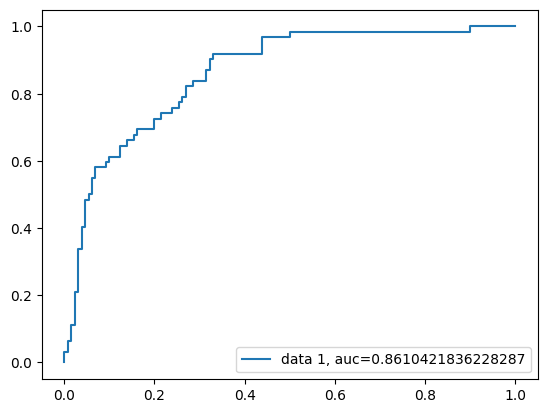

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/ADMIN/Desktop/ml/datasets/diabetes.csv", header=None, names=col_names)

print(pima.dtypes)

pima = pima.apply(pd.to_numeric, errors='coerce')

print(pima.isnull().sum())

pima = pima.dropna()

feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()
